# Importing DateSet

**URL :** https://www.kaggle.com/competitions/icr-identify-age-related-conditions/overview/evaluation

**Dataset Description**
The competition data comprises over fifty anonymized health characteristics linked to three age-related conditions. Your goal is to predict whether a subject has or has not been diagnosed with one of these conditions -- a binary classification problem.

Note that this is a Code Competition, in which the actual test set is hidden. In this version, we give some sample data in the correct format to help you author your solutions. When your submission is scored, this example test data will be replaced with the full test set. There are about 400 rows in the full test set.

In [131]:
import pandas as pd

In [113]:
#reading data
train_set = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/train.csv')
test_set = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
sample_submission = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')

In [4]:
train_set.head(5)


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [5]:
train_set.shape , test_set.shape

((617, 58), (5, 57))

In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      617 non-null    object 
 1   AB      617 non-null    float64
 2   AF      617 non-null    float64
 3   AH      617 non-null    float64
 4   AM      617 non-null    float64
 5   AR      617 non-null    float64
 6   AX      617 non-null    float64
 7   AY      617 non-null    float64
 8   AZ      617 non-null    float64
 9   BC      617 non-null    float64
 10  BD      617 non-null    float64
 11  BN      617 non-null    float64
 12  BP      617 non-null    float64
 13  BQ      557 non-null    float64
 14  BR      617 non-null    float64
 15  BZ      617 non-null    float64
 16  CB      615 non-null    float64
 17  CC      614 non-null    float64
 18  CD      617 non-null    float64
 19  CF      617 non-null    float64
 20  CH      617 non-null    float64
 21  CL      617 non-null    float64
 22  CR

In [7]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      5 non-null      object 
 1   AB      5 non-null      float64
 2   AF      5 non-null      float64
 3   AH      5 non-null      float64
 4   AM      5 non-null      float64
 5   AR      5 non-null      float64
 6   AX      5 non-null      float64
 7   AY      5 non-null      float64
 8   AZ      5 non-null      float64
 9   BC      5 non-null      float64
 10  BD      5 non-null      float64
 11  BN      5 non-null      float64
 12  BP      5 non-null      float64
 13  BQ      5 non-null      float64
 14  BR      5 non-null      float64
 15  BZ      5 non-null      float64
 16  CB      5 non-null      float64
 17  CC      5 non-null      float64
 18  CD      5 non-null      float64
 19  CF      5 non-null      float64
 20  CH      5 non-null      float64
 21  CL      5 non-null      float64
 22  CR    

In [8]:
train_set.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [10]:
train_set["EJ"].value_counts()

B    395
A    222
Name: EJ, dtype: int64

In [11]:
train_set["Class"].value_counts()

0    509
1    108
Name: Class, dtype: int64

### Finding NaN Columns

In [12]:
train_set.isnull().sum().sort_values(ascending=False)

EL       60
BQ       60
CC        3
FS        2
CB        2
FL        1
FC        1
DU        1
GL        1
EE        0
EB        0
EU        0
DY        0
EH        0
EJ        0
DV        0
EP        0
EG        0
Id        0
DL        0
FD        0
FE        0
FI        0
FR        0
GB        0
GE        0
GF        0
GH        0
GI        0
DN        0
DH        0
DI        0
BR        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BZ        0
AB        0
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
Class     0
dtype: int64

In [13]:
# Finding duplicate values
train_set[train_set.duplicated()].sum()

Id       0.0
AB       0.0
AF       0.0
AH       0.0
AM       0.0
AR       0.0
AX       0.0
AY       0.0
AZ       0.0
BC       0.0
BD       0.0
BN       0.0
BP       0.0
BQ       0.0
BR       0.0
BZ       0.0
CB       0.0
CC       0.0
CD       0.0
CF       0.0
CH       0.0
CL       0.0
CR       0.0
CS       0.0
CU       0.0
CW       0.0
DA       0.0
DE       0.0
DF       0.0
DH       0.0
DI       0.0
DL       0.0
DN       0.0
DU       0.0
DV       0.0
DY       0.0
EB       0.0
EE       0.0
EG       0.0
EH       0.0
EJ       0.0
EL       0.0
EP       0.0
EU       0.0
FC       0.0
FD       0.0
FE       0.0
FI       0.0
FL       0.0
FR       0.0
FS       0.0
GB       0.0
GE       0.0
GF       0.0
GH       0.0
GI       0.0
GL       0.0
Class    0.0
dtype: float64

### Solving the NaN Problem

In [16]:
# handle null values 
null_class=['EL' ,'BQ' ,'CC' ,'FS' ,'CB' ,'FL' ,'FC' ,'DU' ,'GL']


for i in null_class:
    train_set[i] = train_set[i].fillna(train_set[i].median()) 
    


train_set.isnull().sum()

Id       0
AB       0
AF       0
AH       0
AM       0
AR       0
AX       0
AY       0
AZ       0
BC       0
BD       0
BN       0
BP       0
BQ       0
BR       0
BZ       0
CB       0
CC       0
CD       0
CF       0
CH       0
CL       0
CR       0
CS       0
CU       0
CW       0
DA       0
DE       0
DF       0
DH       0
DI       0
DL       0
DN       0
DU       0
DV       0
DY       0
EB       0
EE       0
EG       0
EH       0
EJ       0
EL       0
EP       0
EU       0
FC       0
FD       0
FE       0
FI       0
FL       0
FR       0
FS       0
GB       0
GE       0
GF       0
GH       0
GI       0
GL       0
Class    0
dtype: int64

# Data visualization

In [18]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


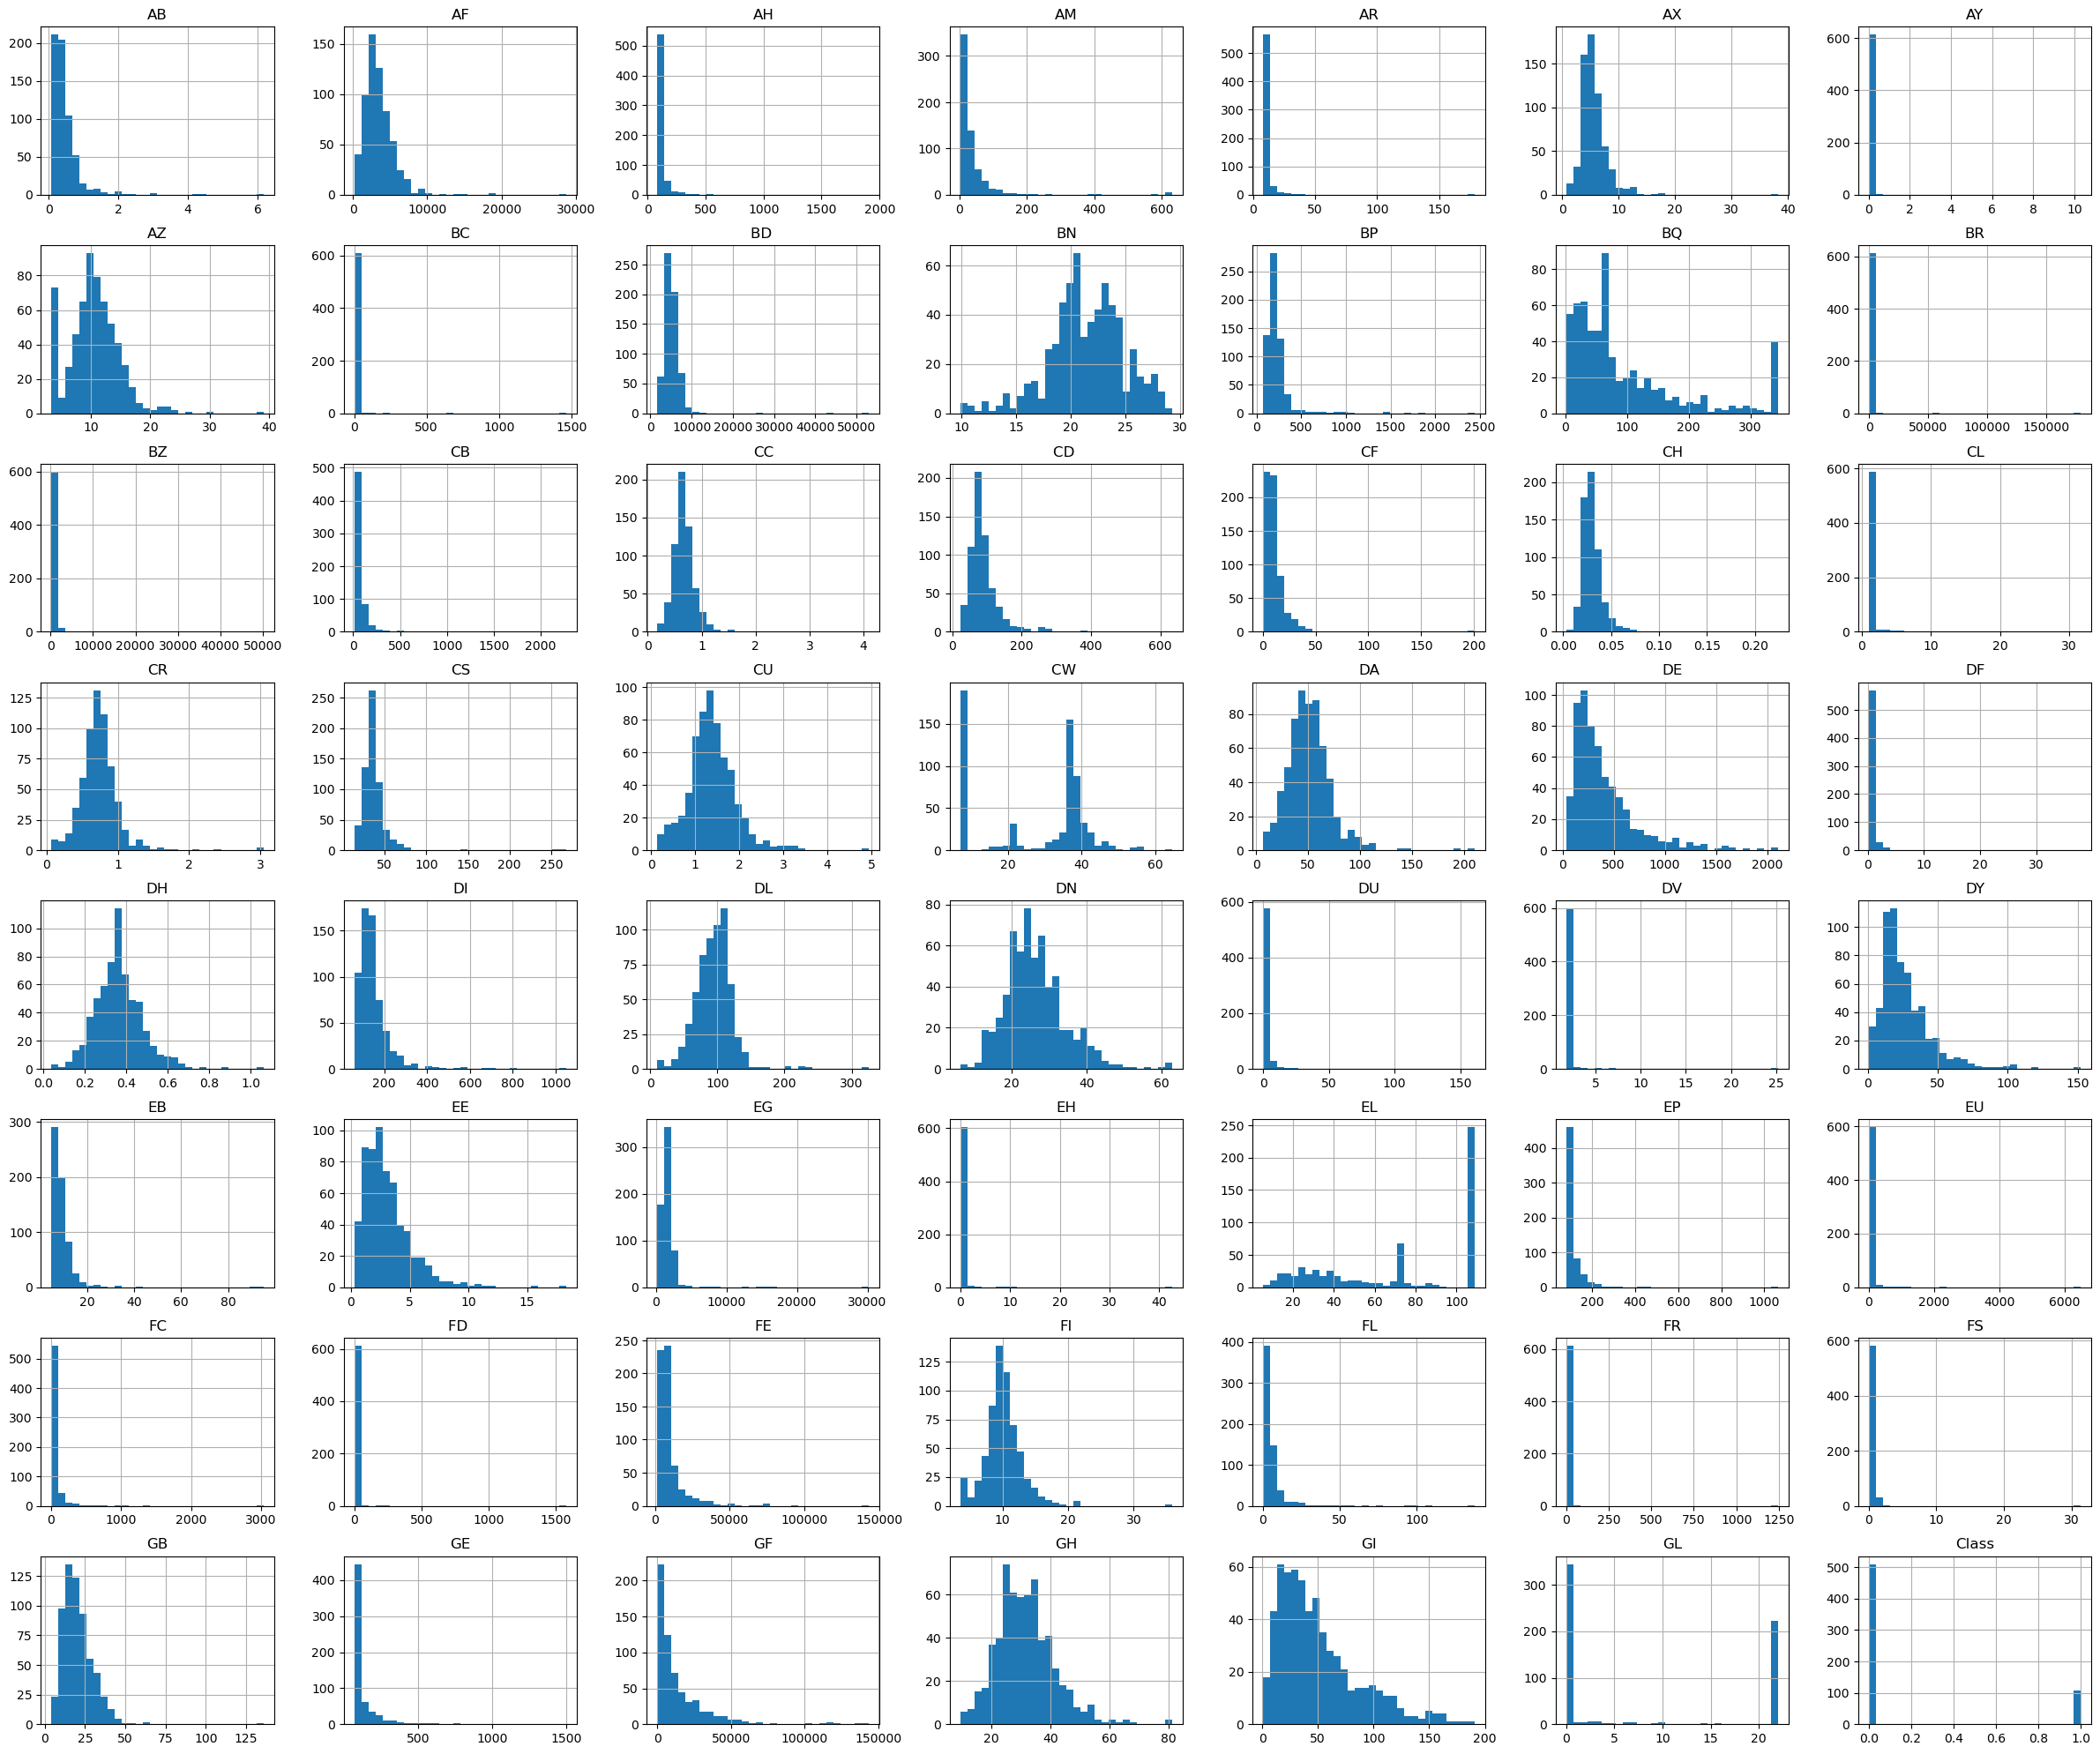

In [19]:
train_set.hist(figsize = (30, 25), bins = 30, legend = False)
plt.show()

# Now using PivotTable Js

url : https://pypi.org/project/pivottablejs/

In [22]:
pip install pivottablejs

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pivottablejs import pivot_ui

In [26]:
pivot_ui(train_set)

<Axes: xlabel='Class', ylabel='count'>

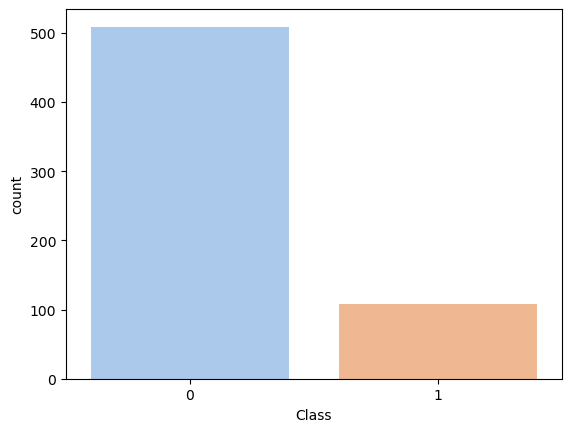

In [29]:
sns.countplot(x="Class",palette="pastel", data=train_set)



<Axes: xlabel='EJ', ylabel='count'>

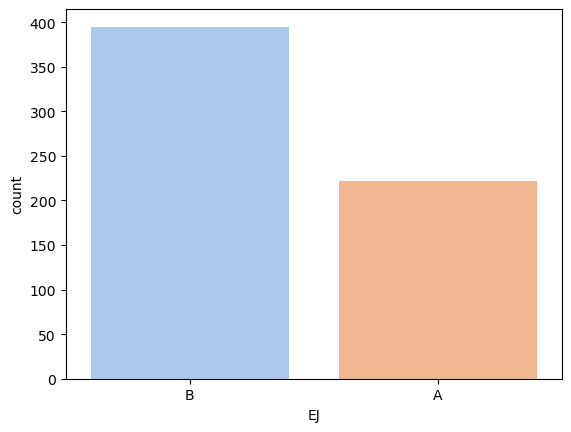

In [30]:
sns.countplot(x='EJ', palette="pastel",data=train_set)

<Axes: xlabel='EJ', ylabel='count'>

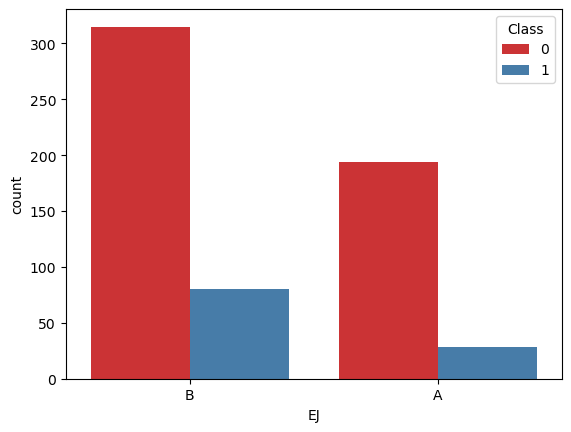

In [31]:
sns.countplot(x = 'EJ', hue= 'Class', palette='Set1', data = train_set)

## feature_selection

In [32]:
from sklearn.feature_selection import mutual_info_regression

#using mutual information 
num_values = train_set.select_dtypes(include="float")
y = train_set['Class']

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(num_values, y)
mi_scores[::3]  # show a few features with their MI scores


DU     0.083355
AB     0.071099
BQ     0.056593
AF     0.050563
BN     0.036161
CR     0.034961
DH     0.026694
EE     0.025935
CD     0.022773
BP     0.019176
FI     0.016980
CW     0.012510
EU     0.005302
CS     0.000000
AZ     0.000000
GB     0.000000
EL     0.000000
DV     0.000000
DL     0.000000
Name: MI Scores, dtype: float64

# Label Encoding

In [126]:
from sklearn import preprocessing

EJ_encoder = preprocessing.LabelEncoder()
train_set["EJ"] = EJ_encoder.fit_transform(train_set["EJ"])
test_set["EJ"] = EJ_encoder.fit_transform(test_set["EJ"])

**Data spliting**

In [36]:
x = train_set.drop(['Id','Class'], axis=True)
y = train_set['Class']

**Data scaling**

In [38]:
from sklearn.preprocessing import StandardScaler 
# data standarization 
sc=StandardScaler()
x_scaled = sc.fit_transform(x)

# Data balancing

Class=1, n=509 (50.000%)
Class=0, n=509 (50.000%)


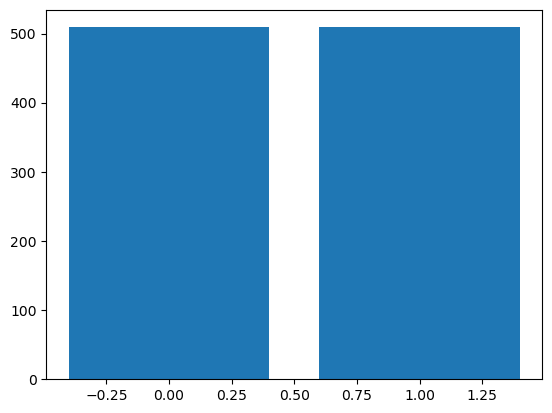

In [39]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(random_state=0)
X, y = oversample.fit_resample(x_scaled, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train and Test split model using to split the data 

In [11]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=42,shuffle=True)

# Using Logistic Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lrREG = LogisticRegression()
lrREG.fit(x_train, y_train)



LogisticRegression()

In [51]:
y_pred = lrREG.predict(x_test)
y_pred_train = lrREG.predict(x_train)

### Testing the model

In [59]:
import numpy as np
from sklearn.metrics import precision_score , recall_score ,accuracy_score , mean_absolute_error


# Assuming y_test and y_pred are defined and contain the appropriate data

print("Precision using LG on test Data: {:.2f} %".format(np.round(precision_score(y_test, y_pred), 4) * 100))
print("Recall using LG on test Data: {:.2f} %".format(np.round(recall_score(y_test, y_pred), 4) * 100))
print("Accuracy using LG on test Data: {:.2f} %".format(np.round(accuracy_score(y_test, y_pred), 4) * 100))
print("MAE using LG on test data:", mean_absolute_error(y_test, y_pred))


Precision using LG on test Data: 94.81 %
Recall using LG on test Data: 95.42 %
Accuracy using LG on test Data: 95.10 %
MAE using LG on test data: 0.049019607843137254


###  Making Graph

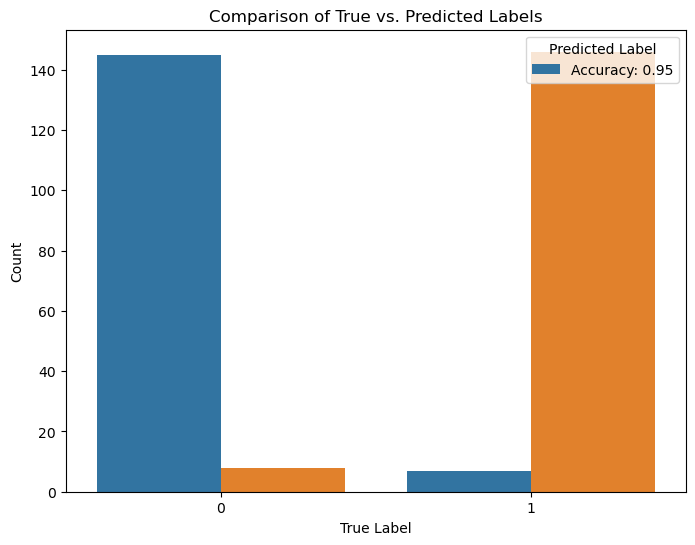

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming y_test and Y_pred are already defined

# Calculate the accuracy score
acc_score = accuracy_score(y_test, y_pred)

# Create a comparison DataFrame
comparison_df = pd.DataFrame({'True Label': y_test, 'Predicted Label': y_pred})

# Create a Seaborn countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=comparison_df, x='True Label', hue='Predicted Label')
plt.title('Comparison of True vs. Predicted Labels')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.legend(title='Predicted Label', loc='upper right', labels=[f'Accuracy: {acc_score:.2f}'])
plt.show()


### A **Random Fores**t is an ensemble learning method used for both classification and regression tasks. It constructs multiple decision trees during training and outputs the class (for classification) or the mean prediction (for regression) of the individual trees. The final prediction is determined by a majority vote (for classification) or averaging (for regression) of the predictions of all the trees in the forest.

In [73]:
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import accuracy_score, mean_squared_error

In [64]:
regressor = RandomForestRegressor(n_estimators=500, random_state=42)

regressor.fit(x_train, y_train)


RandomForestRegressor(n_estimators=500, random_state=42)

# Predicting

In [83]:
y_pred = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)


# Evaluate the model on the test set and get the score
score = regressor.score(x_test, y_test)
print("Random Forest Model Score:", score)

Random Forest Model Score: 0.866190954248366


# Making a pipeline with Grid search For Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler



# Create a pipeline with preprocessing (optional) and Random Forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Optional preprocessing step
    ('rf', RandomForestClassifier())   # Random Forest classifier
])

# Define the parameter grid to search over
param_grid = {
    'rf__n_estimators': [ 100,180,190,195, 200 ,205,210],     # Number of trees in the forest
    'rf__max_depth': [None,9, 10, 15],         # Maximum depth of the trees
    'rf__min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
}

# Create the GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best model and its score on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)

# Print the best hyperparameters and the test score
print("\nBest Hyperparameters:", grid_search.best_params_)
print("\nTest Score:", test_score)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"



Best Hyperparameters: {'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

Test Score: 0.9869281045751634



 #### Best Hyperparameters: {'rf__max_depth': 10, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

**Test Score:** 0.9869281045751634

# XGBoost

In [86]:
import xgboost as xgb

In [87]:
xgb_best = xgb.XGBClassifier(reg_lambda = 0.0017136818758254873,
                   alpha = 0.08108030619363134,
                   colsample_bytree = 0.9,
                   subsample = 0.6,
                   learning_rate = 0.3,
                   n_estimators = 3000,
                   max_depth = 7,
                   min_child_weight = 1)

In [88]:
xgb_best.fit(x_train, y_train)

XGBClassifier(alpha=0.08108030619363134, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=3000, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [89]:
y_pred_xg         = xgb_best.predict(x_test)
y_pred_train_xg   = xgb_best.predict(x_train)
print("Percition   using RF with XGBoost on test Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_xg),4)*100))
print("Recall      using RF with XGBoost on test Data   : {:.2f} %".format(np.round(recall_score(y_test, y_pred_xg),4)*100))
print("Accurcy     using RF with XGBoost on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_xg),4)*100))

Percition   using RF with XGBoost on test Data  : 95.62 %
Recall      using RF with XGBoost on test Data   : 100.00 %
Accurcy     using RF with XGBoost on test Data   : 97.71 %


# Making a pipeline with Grid search For XGBoost

In [94]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler


pipeline = Pipeline([
    ('scaler', StandardScaler()),    # Optional preprocessing step
    ('xgb', xgb.XGBClassifier())     # XGBoost classifier
])

# Define the parameter grid to search over
param_grid = {
    'xgb__max_depth': [ 6,7,8, 9],               # Maximum depth of the trees
    'xgb__learning_rate': [0.1,0.3 ,  0.01, ],  # Step size shrinkage used in updates
    'xgb__n_estimators': [1000,3000 ,4000 ]  ,
                       # Number of boosting rounds
}

# Create the GridSearchCV object with the pipeline and parameter grid
grid_search_x = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to find the best hyperparameters
grid_search_x.fit(x_train, y_train)

# Get the best model and its score on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)

# Print the best hyperparameters and the test score
print("Best Hyperparameters:", grid_search_x.best_params_)
print("Test Score:", test_score)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Hyperparameters: {'xgb__learning_rate': 0.3, 'xgb__max_depth': 6, 'xgb__n_estimators': 1000}
Test Score: 0.9705882352941176


In [130]:
y_pred_xg         = grid_search_x.predict(x_test)
y_pred_train_xg   = grid_search_x.predict(x_train)
print("Percition   using RF with XGBoost on test Data  : {:.2f} %".format(np.round(precision_score(y_test, y_pred_xg),4)*100))
print("Recall      using RF with XGBoost on test Data   : {:.2f} %".format(np.round(recall_score(y_test, y_pred_xg),4)*100))
print("Accurcy     using RF with XGBoost on test Data   : {:.2f} %".format(np.round(accuracy_score(y_test, y_pred_xg),4)*100))

Percition   using RF with XGBoost on test Data  : 95.62 %
Recall      using RF with XGBoost on test Data   : 100.00 %
Accurcy     using RF with XGBoost on test Data   : 97.71 %


In [129]:

xgb_kf_df = pd.DataFrame({"actual":y_test,"predicted":y_pred_xg })
xgb_kf_df.head(5)

,actual,predicted
528,0,0
914,1,1
587,0,0
31,1,1
136,0,0


# Submission

In [140]:
prob_xgb_k = pd.DataFrame(grid_search_x.predict_proba(test_set.drop("Id",axis=1)))
sample_submission['Id'] = test_set.reset_index()['Id']
sample_submission["class_0"] = prob_xgb_k[0]
sample_submission["class_1"]  = prob_xgb_k[1]
sample_submission.set_index('Id').to_csv('submission.csv')
sample_submission.head()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


,Id,class_0,class_1
0,00eed32682bb,0.99559,0.00441
1,010ebe33f668,0.99559,0.00441
2,02fa521e1838,0.99559,0.00441
3,040e15f562a2,0.99559,0.00441
4,046e85c7cc7f,0.99559,0.00441


In [142]:
sub=pd.read_csv("/kaggle/working/submission.csv")
sub.head()

,Id,class_0,class_1
0,00eed32682bb,0.99559,0.00441
1,010ebe33f668,0.99559,0.00441
2,02fa521e1838,0.99559,0.00441
3,040e15f562a2,0.99559,0.00441
4,046e85c7cc7f,0.99559,0.00441


# Author

* Name : Farshid Hossain
* Github : https://github.com/farshid101
* Linkedin : https://www.linkedin.com/in/farshid-hossain-b67890218/